# Assignment 3

The assignment 3 contains 2 questions and the due date is April 24th (Sunday) 23:59PM.

## Question 1 Image Compression

In this question, you will work with images and apply KMeans for image compression, by reducing the number of colours that occur in an image to only those that are most common in that image.


### Question 1.1 (0 points)

To let you learn how Python work with images, plese complete this question.

### Black & white images

Each images represent a matrix where each pixel is an element of this matrix 

<img src="https://miro.medium.com/max/1386/1*bV7S0zACdidh11ikjYpLpQ.png">

The scale of colors is between 0 and 255 : 0 correspond to black and 255 to white

### Colored images
<img src="https://miro.medium.com/max/840/1*y0nV4cWk3KbzXSe9dIWL5g.jpeg">


Every color is a linear combinaison of primary colors : Red Green Blue <br/>
A colored image is somehow just the supperposition of three images : for each pixel with have three values




### Download images

We are using the famous [The CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) that consists of 60000 32x32 color images in 10 classes, with 6000 images per class. We need to donwload this dataset from tensorflow. If you have not installed tensorflow, please follow the [instllation guide](https://www.tensorflow.org/install) to get it or simply use Google colab for this assignment.




In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
from tensorflow import keras

In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

By checking the shape, you will find the train set contains 50,000 images with the shape of (32, 32, 3) that indicates the image resolution with 3 color channels.

In [6]:
x_train.shape

(50000, 32, 32, 3)

You can visually check a random image:

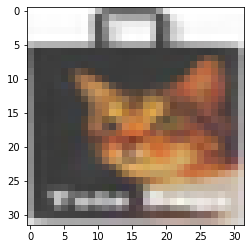

In [7]:
plt.imshow(x_train[3000])

We can also check the image at each of three channels:

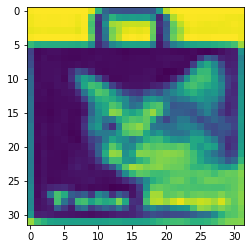

In [8]:
plt.imshow(x_train[3000][:, :, 0])

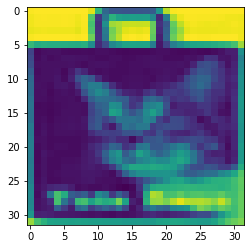

In [9]:
plt.imshow(x_train[3000][:, :, 1])

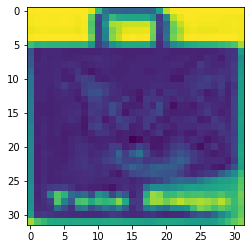

In [10]:
plt.imshow(x_train[3000][:, :, 2])

We can convert a color image as a greyscale image using the NTSC formula: 0.299 ∙ Red + 0.587 ∙ Green + 0.114 ∙ Blue. This formula closely represents the average person's relative perception of the brightness of red, green, and blue light.

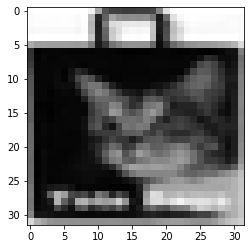

In [11]:
R, G, B = x_train[3000][:,:,0], x_train[3000][:,:,1], x_train[3000][:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(imgGray, cmap='gray')

### Question 1.2 (15 points)

Convert all color images in x_train into greyscale images and use the sklearn.decomposition.PCA to perform principal component analysis to the dataset to reduce dimensions to 256. Then, reconstruct images from its reduced representation. Choose a image and see how it goes before and after the PCA using imread method. Explain your findings.  

**Hint** You may need to use numpy's reshape method to change the representation of each image as a vector before performing PCA and reshape it back as an image before you are able to visualize it.

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
x_train_grey_scale = 0.2989 * x_train[:,:,:,0] + 0.5870 * x_train[:,:,:,1] + 0.1140 * x_train[:,:,:,2]

In [14]:
x_train_grey_scale.shape

(50000, 32, 32)

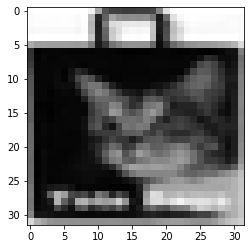

In [15]:
plt.imshow(x_train_grey_scale[3000], cmap='gray')

In [17]:
nsamples, nx, ny = x_train_grey_scale.shape
x_train_pca = x_train_grey_scale.reshape((nsamples,nx*ny))
x_train_pca.shape

(50000, 1024)

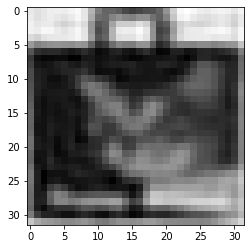

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=256)
x_train_trans = pca.fit_transform(x_train_pca)
x_train_origin = pca.inverse_transform(x_train_trans)
im = np.reshape(x_train_origin[3000], (nx,ny))
plt.imshow(im, cmap='gray')

***_We can still spot the cat in the image, even with more gray zones than the previous one, also less sharpness and black and white intensity._***

### Question 1.3 (15 points)

Now explain which number of principal components should be chosen using Elbow method if PCA reaches 90% threshold of explained variance. Use the obtained number of principal components to reduce the image dimensions and again compare the reconstructed images from the previous step. Expalin your findings.

Number of components explaining 90% variance: 75


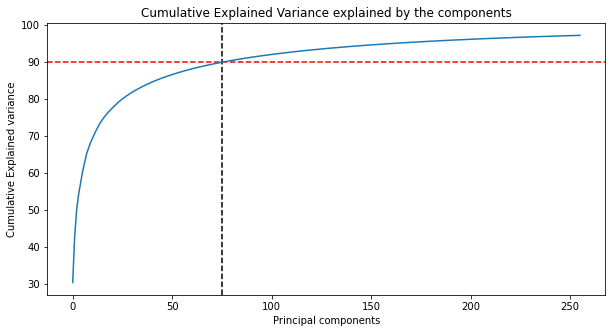

In [19]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
 
k = np.argmax(var_cumu>90)
print("Number of components explaining 90% variance: "+ str(k))
 
plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

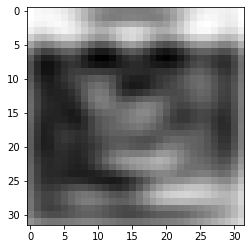

In [20]:
from sklearn.decomposition import PCA
pca_ = PCA(n_components=75)
x_train_trans_ = pca_.fit_transform(x_train_pca)
x_train_origin_ = pca_.inverse_transform(x_train_trans_)
im_ = np.reshape(x_train_origin_[3000], (nx,ny))
plt.imshow(im_, cmap='gray')

***Depending on the graph, 75 features are enough to preserve 90% of the variance. The cat is barely visible (it looks more of a skeleton to me), but the case in which the cat figures is still spotable***

### Question 1.4 (15 points)

Now build an image classifier of Logistic Regression (with default configuration) to predict the class of images using the original greyscale images and the compressed representations from PCA that explains 90% of variance. Use the 5-fold cross-validation to report the average macro-f1 test score (given this is a balanced dataset) and total fit time. Explain your findings.

Hint: y_train contains the uint8 value and cross-validate would not consider it as the label for classification. You need to convert the y_train into categorical values such that cross-validate would perform multi-class classification.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

model = LogisticRegression()
model.fit(x_train_origin, y_train_enc)


LogisticRegression()

In [22]:
score = cross_val_score(model, x_train_origin_, y_train_enc, cv=5, scoring="f1_macro")

In [44]:
score.mean()

0.28223904288465274

In [51]:
score = cross_val_score(model, x_train_pca, y_train_enc, cv=5, scoring="f1_macro")

In [53]:
score.mean()

0.0807190240570947

***We notice a big difference in scores and a big difference in time taken by each cross validation, because PCA saves the overall data on a macro scale since it's just an algebric reduction and transformation. let's now dig deeper in our model with 75 components and make some predictions***

In [24]:
x_test_grey_scale = 0.2989 * x_test[:,:,:,0] + 0.5870 * x_test[:,:,:,1] + 0.1140 * x_test[:,:,:,2]
nsamples, nx, ny = x_test_grey_scale.shape
x_test_pca = x_test_grey_scale.reshape((nsamples,nx*ny))
x_test_pca.shape
pcat = PCA(n_components=75)
x_test_trans = pcat.fit_transform(x_test_pca)
x_test_origin = pcat.inverse_transform(x_test_trans)

In [25]:
en = LabelEncoder()
y_test_enc = en.fit_transform(y_test)
y_pred = model.predict(x_test_origin)

<AxesSubplot:>

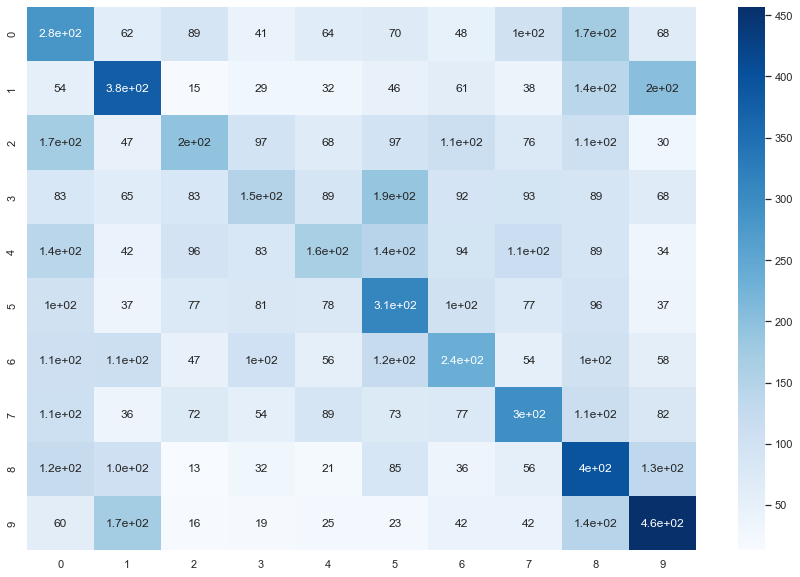

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test_enc, y_pred)
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
               
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
               
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
               
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names, group_percentages, group_counts)]
               
labels = np.asarray(labels).reshape(2,2)


sns.set(rc = {'figure.figsize':(20,10)})
df_cm = pd.DataFrame(cf_matrix, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (15,10))
sns.heatmap(df_cm, annot=True, cmap='Blues')

In [27]:
pd.crosstab(index=pd.Series(y_pred, name="Pred"), columns=pd.Series(y_test_enc, name="Real"))

Real,0,1,2,3,4,5,6,7,8,9
Pred,,,,,,,,,,
0,282,54,172,83,140,103,109,108,123,60
1,62,380,47,65,42,37,111,36,105,171
2,89,15,195,83,96,77,47,72,13,16
3,41,29,97,149,83,81,104,54,32,19
4,64,32,68,89,164,78,56,89,21,25
5,70,46,97,189,145,313,123,73,85,23
6,48,61,111,92,94,101,235,77,36,42
7,103,38,76,93,113,77,54,295,56,42
8,173,142,107,89,89,96,103,114,395,145


In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f'Accuracy of the model is {accuracy_score(y_test_enc, y_pred)}')
print(f'Recall of the model is {recall_score(y_test_enc, y_pred, average="macro")}')
print(f'Precision of the model is {precision_score(y_test_enc, y_pred, average="macro", zero_division=1)}')

Accuracy of the model is 0.2865
Recall of the model is 0.2865
Precision of the model is 0.282558959106307


***Since the PCA is just a dimension reduction but no change in the overall data or whatsoever, we see that our model is making 28% of the predictions correct, and this only with no regularization or tuning, which is itself promising. PCA then preserves almost all information about data, and just reduces dimension for fast processing, only relevant information is preserved.***

### Question 1.5 (15 points)

Now let's work with the color images (with 3 channels) and again compress one image, this time by reducing numbers of colors using K-means. You need to cluster pixel values into **32 clusters** and choose the "mean color" to replace all the pixels in each cluster by this mean color. Show the original color image of cat and the mean color image of the same one. Explain your findings. 

Hint: each color pixel is represented by a 3D (R,G,B) vector, and the image would have 32x32 pixels. So you could find the mean color from the centroids of 32 clusters and update the pixels of image with the mean color.

Hint2: Once you have replaced the pixel values with mean color, you need to explicitly convert it into **uint type** such s uint8, uint16, etc, because the image pixel values can only be represented as integers or fractions.

(32, 32, 3)

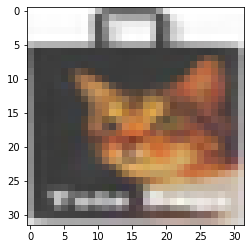

In [16]:
cat_image = x_train[3000]
plt.imshow(cat_image)
cat_image.shape

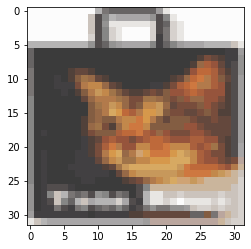

In [17]:
from sklearn.cluster import KMeans
a,b,_ = cat_image.shape
cat_image = cat_image.reshape(a*b,3)

kmeans = KMeans(n_clusters=32, random_state=42).fit(cat_image)

labels = kmeans.predict(cat_image)

palette = np.array(kmeans.cluster_centers_).astype(int)

new_cat_image = np.copy(cat_image)
for index in range(len(new_cat_image)):
    new_cat_image[index] = palette[labels[index]]
    
new_cat_image = new_cat_image.reshape(a,b,3)

plt.imshow(new_cat_image)

***For 32 clusters, almost all caracteristics of the image are preserved. The colors are not that different, however I think 32 clusters is a bit a lot. Let's do an elbow method to determine the optimal number of clusters, just for a trial.***

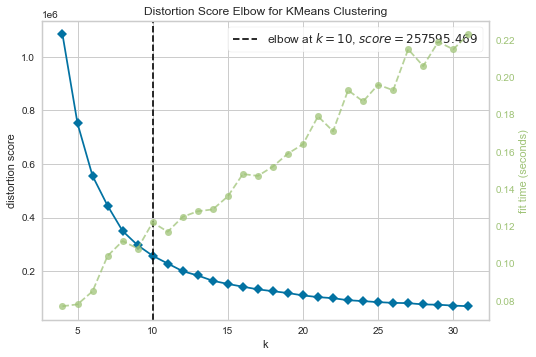

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
cat_image = x_train[3000]
a,b,_ = cat_image.shape
cat_image = cat_image.reshape(a*b,3)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,32))
visualizer.fit(cat_image)
visualizer.poof()

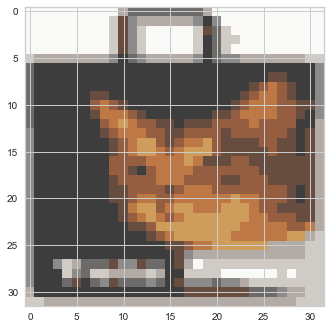

In [19]:
from sklearn.cluster import KMeans


kmeans_ = KMeans(n_clusters=10, random_state=42).fit(cat_image)

labels = kmeans_.predict(cat_image)

palette = np.array(kmeans_.cluster_centers_).astype(int)

new_cat_image_ = np.copy(cat_image)
for index in range(len(new_cat_image_)):
    new_cat_image_[index] = palette[labels[index]]
    
new_cat_image_ = new_cat_image_.reshape(a,b,3)

plt.imshow(new_cat_image_)

***We can see that even with 10 clusters, we can almost save lots of caracteristics from the image and preserve the overall shape. We win lots of time in computations which will be crucial if we want to process a big image or lots of similar image in one time.***

## Question 2 Birds of a feather sing together


In this question, you will work with movie ratings to build a recommender system just like Netflix, Youtube, etc.


__Load the datasets in three different pandas dataframes `movies`, `tags` and `ratings`.__


In [32]:
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
ratings = pd.read_csv('ratings.csv')


In [33]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [34]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [35]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Let's filter the ratings dataframe, to have only movies that have received a rating:

In [36]:
movies['genres'] = movies['genres'].str.replace('|',' ')
movies = movies[movies.movieId.isin(ratings.movieId.unique().tolist())]
movies.shape

(9724, 3)

### Question 2.1 (20 points) Content-based recommender system

We create a new feature called metadata, that merges all the text data information we have about a movie : the genre and the tags. So the merged dataframe should contain at least the following columns: *movieId, title and metadata*.

Then, construct the vectorized reprentation of metadata using sklearn's Countvectorizer to transform the metadata into vectors. Learn the latent matrix from the metadata vector using [truncated SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) with 50 dimensions. With the generated latent matrix, identify the top 10 most relevant movies for **"Toy Story (1995)"** by calculating the cosine similairty and finding movies with the highest similarity score. 



In [37]:
metadata = movies["genres"] + " " + tags["tag"]
movies["metadata"]=metadata
movies = movies.dropna(subset="metadata")
movies.shape

(3678, 4)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
vectorizer = CountVectorizer()
metadata_vec = vectorizer.fit_transform(movies["metadata"])

truncat = TruncatedSVD(n_components=50)
metadata_SVD = truncat.fit_transform(metadata_vec)


In [39]:
from sklearn.metrics.pairwise import cosine_similarity
def cos(mov1,mov2):
    return cosine_similarity(np.reshape(mov1, (1,-1)),np.reshape(mov2, (1,-1)))

ind = movies.index[movies["title"] == "Toy Story (1995)"]
toystory = metadata_SVD[ind][0]
res = np.array([cos(toystory, x) for x in metadata_SVD])
res = [res[t].item(0) for t in range(len(res))]
df = movies
df["cosine similarity tags"] = res
df.nlargest(10, "cosine similarity tags")

,movieId,title,genres,metadata,cosine similarity tags
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy funny,1.000000
3568,4886,"Monsters, Inc. (2001)",Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy ma...,0.914695
2809,3754,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy De...,0.914516
3000,4016,"Emperor's New Groove, The (2000)",Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy Un...,0.914472
2355,3114,Toy Story 2 (1999),Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy Ir...,0.914397
1706,2294,Antz (1998),Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy ni...,0.914284
1357,1848,"Borrowers, The (1997)",Adventure Children Comedy Fantasy,Adventure Children Comedy Fantasy submarine,0.818584
1599,2141,"American Tail, An (1986)",Adventure Animation Children Comedy,Adventure Animation Children Comedy Screwball,0.818435
637,810,Kazaam (1996),Children Comedy Fantasy,Children Comedy Fantasy animation,0.818210
3336,4519,"Land Before Time, The (1988)",Adventure Animation Children Fantasy,Adventure Animation Children Fantasy remake,0.817440


### Question 2.2 (15 points) Collaborative filtering recommender system

Similarly, let's creat a latent matrix for ratings and also show the top 10 most relevant movies that receive similar ratings. 




In [40]:
rating_new = pd.merge(movies, ratings, on="movieId")
rating_latent=rating_new.pivot(index="movieId", columns="userId", values="rating")
rating_latent = rating_latent.fillna(0)


In [41]:
rating_tru = TruncatedSVD(n_components=50)
rating_SVD = rating_tru.fit_transform(rating_latent)
rating_SVD

array([[38.74580565, 12.39800281,  1.04707118, ..., -1.95464909,
        -5.32778869,  2.53110904],
       [20.32955052, 12.13799698, -2.78566339, ..., -0.96367876,
        -0.17797243, -4.26828026],
       [ 9.42541121,  4.17656604, -6.09708425, ..., -0.31837396,
        -0.20884753,  0.66099847],
       ...,
       [ 0.7752464 , -0.30276429, -0.25227857, ..., -0.10857602,
        -0.58370293,  0.63188867],
       [ 0.86705573, -0.62286882, -0.93355958, ...,  0.10026853,
         0.04503421, -0.20275635],
       [ 4.75659638, -2.26622622, -0.68714544, ...,  1.26367229,
        -0.28295428, -1.10945582]])

In [42]:
ind = movies.index[movies["title"] == "Toy Story (1995)"]
toystory = rating_SVD[ind][0]
res = np.array([cos(toystory, x) for x in rating_SVD])
res = [res[t].item(0) for t in range(len(res))]
df["cosine similarity rating"] = res
df.nlargest(10, "cosine similarity rating")

,movieId,title,genres,metadata,cosine similarity tags,cosine similarity rating
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy funny,1.000000,1.000000
615,780,Independence Day (a.k.a. ID4) (1996),Action Adventure Sci-Fi Thriller,Action Adventure Sci-Fi Thriller remix culture,0.182815,0.780518
2355,3114,Toy Story 2 (1999),Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy Ir...,0.914397,0.777469
546,648,Mission: Impossible (1996),Action Adventure Mystery Thriller,Action Adventure Mystery Thriller memory,0.205035,0.757668
418,480,Jurassic Park (1993),Action Adventure Sci-Fi Thriller,Action Adventure Sci-Fi Thriller Nerd,0.183019,0.750506
964,1265,Groundhog Day (1993),Comedy Fantasy Romance,Comedy Fantasy Romance dark,0.411572,0.743691
815,1073,Willy Wonka & the Chocolate Factory (1971),Children Comedy Fantasy Musical,Children Comedy Fantasy Musical martial arts,0.604658,0.733526
1757,2355,"Bug's Life, A (1998)",Adventure Animation Children Comedy,Adventure Animation Children Comedy In Netflix...,0.617951,0.730316
506,588,Aladdin (1992),Adventure Animation Children Comedy Musical,Adventure Animation Children Comedy Musical su...,0.669260,0.730129
314,356,Forrest Gump (1994),Comedy Drama Romance War,Comedy Drama Romance War Robert Downey Jr.,0.205577,0.724104


### Question 2.3 (5 points) Hybrid recommender system

Similarly, let's build a hybrid recommender system and also show the top 10 most relevant movies that calculate the average measure of both content and collaborative.


In [43]:
df["average rating"]=df[["cosine similarity tags", "cosine similarity rating"]].mean(axis=1)
df.nlargest(11, "average rating")

,movieId,title,genres,metadata,cosine similarity tags,cosine similarity rating,average rating
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy funny,1.000000,1.000000,1.000000
2355,3114,Toy Story 2 (1999),Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy Ir...,0.914397,0.777469,0.845933
3568,4886,"Monsters, Inc. (2001)",Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy ma...,0.914695,0.687852,0.801274
3194,4306,Shrek (2001),Adventure Animation Children Comedy Fantasy Ro...,Adventure Animation Children Comedy Fantasy Ro...,0.772583,0.712627,0.742605
1706,2294,Antz (1998),Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy ni...,0.914284,0.528547,0.721415
506,588,Aladdin (1992),Adventure Animation Children Comedy Musical,Adventure Animation Children Comedy Musical su...,0.669260,0.730129,0.699694
2250,2987,Who Framed Roger Rabbit? (1988),Adventure Animation Children Comedy Crime Fant...,Adventure Animation Children Comedy Crime Fant...,0.771126,0.616888,0.694007
3000,4016,"Emperor's New Groove, The (2000)",Adventure Animation Children Comedy Fantasy,Adventure Animation Children Comedy Fantasy Un...,0.914472,0.458608,0.686540
1,2,Jumanji (1995),Adventure Children Fantasy,Adventure Children Fantasy Highly quotable,0.707242,0.662622,0.684932
1757,2355,"Bug's Life, A (1998)",Adventure Animation Children Comedy,Adventure Animation Children Comedy In Netflix...,0.617951,0.730316,0.674133
